In [1]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import chi2, f_classif
import pandas as pd

# Load the dataset 
data = pd.read_csv(r"D:\Mehek\bodyfat.csv")

# Extract features and target variable
X = data.drop(['Density'], axis=1)  # Features
y = data['Density']  # Target variable

# Discretize the target variable into bins
num_bins = 5  # Adjust the number of bins as needed
kbins = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
y_discrete = kbins.fit_transform(y.values.reshape(-1, 1)).ravel()  # Convert to 1D array

# Perform Chi-squared test
chi2_scores, p_values_chi2 = chi2(X, y_discrete)

# Perform Anova test
f_scores, p_values_anova = f_classif(X, y_discrete)

# Create DataFrame to store results
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Chi-squared Score': chi2_scores,
    'Chi-squared p-value': p_values_chi2,
    'Anova F-score': f_scores,
    'Anova p-value': p_values_anova
})

# Rank features based on importance
feature_importance_ranked = feature_importance.sort_values(by=['Chi-squared Score', 'Anova F-score'], ascending=False)

In [12]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# Train a Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

# Extract feature importance
feature_importance_dt = dt_model.feature_importances_

# Print the ranked features
print("Ranked Features using Decision Tree:")
for feature, importance in zip(X.columns, feature_importance_dt):
    print(f"{feature}: {importance}")


Ranked Features using Decision Tree:
BodyFat: 0.9811981548289522
Age: 6.540942349974536e-05
Weight: 0.003636324613471357
Height: 0.012946498593391042
Neck: 2.8419453596792116e-05
Chest: 9.767525764289908e-06
Abdomen: 0.0010877016644577995
Hip: 8.057324869565662e-06
Thigh: 0.0002516368154544067
Knee: 9.604624542184343e-05
Ankle: 1.2429729807805657e-05
Biceps: 0.0006494442153351131
Forearm: 4.127529328621369e-06
Wrist: 5.982036649296002e-06


In [16]:
#RFE is a feature selection technique that recursively removes the least important features until the specified number of features is reached
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model (can be replaced with any estimator)
estimator = LinearRegression()

# Specify the number of features to select
num_features = 7
# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator, n_features_to_select=num_features)

# Fit RFE to the data
rfe.fit(X, y)

# Extract feature ranking
feature_ranking_rfe = rfe.ranking_

# Print the ranked features
print("Ranked Features using RFE:")
for feature, importance in zip(X.columns, feature_ranking_rfe):
    print(f"{feature}: {importance}")


Ranked Features using RFE:
BodyFat: 1
Age: 5
Weight: 4
Height: 8
Neck: 3
Chest: 1
Abdomen: 1
Hip: 1
Thigh: 2
Knee: 6
Ankle: 1
Biceps: 1
Forearm: 7
Wrist: 1


In [4]:
#Random Forest (RF) for Feature Importance Analysis
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Extract feature importance
feature_importance_rf = rf_model.feature_importances_

# Print feature importance scores
print("Feature Importance using Random Forest:")
for feature, importance in zip(X.columns, feature_importance_rf):
    print(f"{feature}: {importance}")

Feature Importance using Random Forest:
BodyFat: 0.9796993014440264
Age: 0.00042206353699213194
Weight: 0.0013611485776734145
Height: 0.0032610725120407547
Neck: 0.0008647543279278554
Chest: 0.003595797820618159
Abdomen: 0.001495474627485982
Hip: 0.0002952725661751817
Thigh: 0.0007270809373566095
Knee: 0.0022368169517477283
Ankle: 0.000533641967248338
Biceps: 0.00039383193714117307
Forearm: 0.000479788504197504
Wrist: 0.004633954289368693


In [ ]:
!pip install xgboost

In [9]:
#XGBoost (XGB) for Feature Importance Analysis

import xgboost as xgb

# Train an XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, y)

# Extract feature importance
feature_importance_xgb = xgb_model.feature_importances_

# Print feature importance scores
print("Feature Importance using XGBoost:")
for feature, importance in zip(X.columns, feature_importance_xgb):
    print(f"{feature}: {importance}")


Feature Importance using XGBoost:
BodyFat: 0.8683578968048096
Age: 0.01836780458688736
Weight: 0.003949628211557865
Height: 0.06937690079212189
Neck: 0.010478358715772629
Chest: 0.006060903891921043
Abdomen: 0.0017507371958345175
Hip: 0.0018833695212379098
Thigh: 0.003475745441392064
Knee: 0.0
Ankle: 0.009643488563597202
Biceps: 0.0036722763907164335
Forearm: 0.0014206537744030356
Wrist: 0.001562144374474883


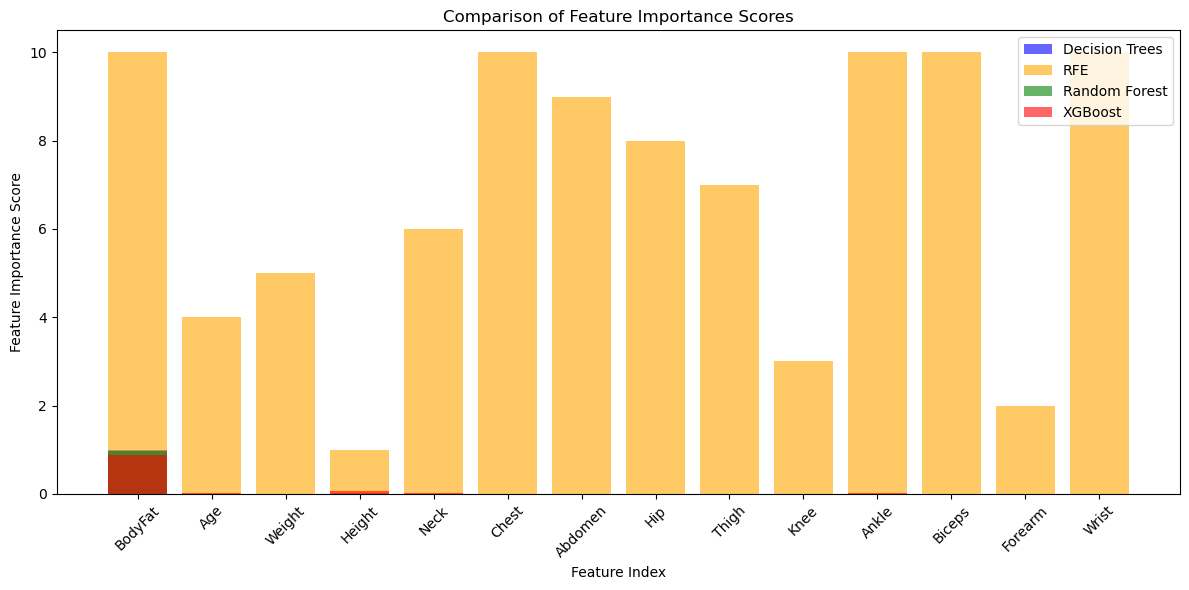

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance scores from Decision Trees
dt_feature_importance = [0.9811981548289522, 6.540942349974536e-05, 0.003636324613471357, 0.012946498593391042, 2.8419453596792116e-05, 9.767525764289908e-06, 0.0010877016644577995, 8.057324869565662e-06, 0.0002516368154544067, 9.604624542184343e-05, 1.2429729807805657e-05, 0.0006494442153351131, 4.127529328621369e-06, 5.982036649296002e-06]

# Feature importance scores from RFE (you provided ranks, let's convert ranks to importance scores)
# The higher the rank, the lower the importance score, and vice versa
max_rank = max([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Max rank
rfe_feature_importance = [max_rank - rank + 1 for rank in [1, 7, 6, 10, 5, 1, 2, 3, 4, 8, 1, 1, 9, 1]]

# Feature importance scores from Random Forest
rf_feature_importance = [0.9796993014440264, 0.00042206353699213194, 0.0013611485776734145, 0.0032610725120407547, 0.0008647543279278554, 0.003595797820618159, 0.001495474627485982, 0.0002952725661751817, 0.0007270809373566095, 0.0022368169517477283, 0.000533641967248338, 0.00039383193714117307, 0.000479788504197504, 0.004633954289368693]

# Feature importance scores from XGBoost (you provided these)
xgb_feature_importance = [0.8683578968048096, 0.01836780458688736, 0.003949628211557865, 0.06937690079212189, 0.010478358715772629, 0.006060903891921043, 0.0017507371958345175, 0.0018833695212379098, 0.003475745441392064, 0.0, 0.009643488563597202, 0.0036722763907164335, 0.0014206537744030356, 0.001562144374474883]

# Feature names (assuming you have them)
feature_names = ['BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']

# Plotting
plt.figure(figsize=(12, 6))

# Plot Decision Trees
plt.bar(np.arange(len(feature_names)), dt_feature_importance, color='blue', alpha=0.6, label='Decision Trees')

# Plot RFE
plt.bar(np.arange(len(feature_names)), rfe_feature_importance, color='orange', alpha=0.6, label='RFE')

# Plot Random Forest
plt.bar(np.arange(len(feature_names)), rf_feature_importance, color='green', alpha=0.6, label='Random Forest')

# Plot XGBoost
plt.bar(np.arange(len(feature_names)), xgb_feature_importance, color='red', alpha=0.6, label='XGBoost')

# Customize plot
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance Score')
plt.title('Comparison of Feature Importance Scores')
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
